**By: Ahmed Abdulghany**

### In this chapter:

**1. Linear Regression**

Simplest model for predicting a continuous value (e.g., house prices).

Two training methods:

- Closed-form solution

        Direct formula → Calculates the best model parameters in one go

        Uses linear algebra (matrix operations)

- Gradient Descent (GD)

        Iterative optimization → Gradually improves parameters

        Essential for scaling to big datasets and complex models

        Variants:

            Batch GD → All data at once

            Mini-batch GD → Small batches

            Stochastic GD → One example at a time

**2. Polynomial Regression**

    Fits nonlinear data by adding powers of input features (e.g., x^2,x^3x^2,x^3)

    Challenge: More parameters → More prone to overfitting

How to fight overfitting?

    Learning curves → Diagnose bias vs. variance

    Regularization techniques:

        Ridge regression (L2)

        Lasso regression (L1)

        Elastic Net (combination)

**3. Classification Models**

- Logistic Regression

        Used for binary classification (yes/no, spam/not spam)

        Outputs probabilities

- Softmax Regression

        Used for multiclass classification (e.g., digit 0–9)

        Generalization of logistic regression

# Linear Regression
Linear regression predicts a target value (ŷ) by taking a weighted sum of input features (x₁, x₂, ..., xₙ) and adding constant called bias (θ₀)

**Linear Regression model prediction Form**



y = θ0
+ θ1
x1
+ θ2
x2
+ ⋯ + θn
xn
In this equation:
• ŷ is the predicted value.
• n is the number of features.
• xi
 is the i
th feature value.
• θj
 is the j
th model parameter (including the bias term θ0
 and the feature weights
θ1
, θ2
, ⋯, θn
).


**Linear Regression model prediction (vectorized form)**


y = hθ
x = θ · x
In this equation:
• θ is the model’s parameter vector, containing the bias term θ0
 and the feature
weights θ1
 to θn
.
• x is the instance’s feature vector, containing x0
 to xn
, with x0
 always equal to 1.
• θ · x is the dot product of the vectors θ and x, which is of course equal to θ0x0 +
θ1x1
 + θ2x2
 + ... + θnxn
.
• hθ
 is the hypothesis function, using the model parameters θ.


## The Normal Equation:
Is a powerful tool in linear regression. **It directly computes the parameters that minimize the Mean Squared Error (MSE)** without needing iterative optimization like gradient descent.

In [2]:
import numpy as np
np.random.seed(42)
m=100
X=2*np.random.rand(m,1)
y=4+3*X+np.random.rand(m,1)

modeling a function like this

**y=4+3x+noise**

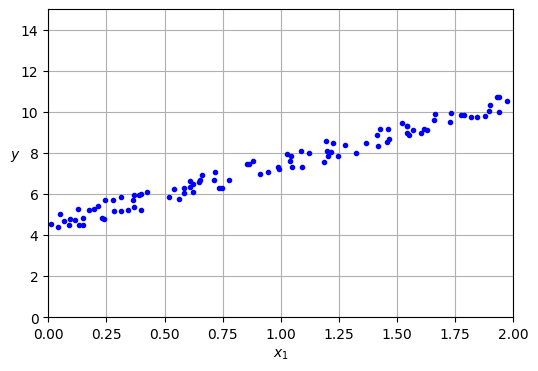

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()

plt.show()

**Prepare feature matrix (add bias term)**

In [4]:
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X) # Adds a column of 1s for θ₀ (bias)

In [5]:
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
print(theta_best)

[[4.51359766]
 [2.98323418]]


This means:
- θ0​≈4.215 → This is the intercept (the value of y when x=0).
- θ1≈2.770θ1​≈2.770 → This is the slope (how much y increases when x increases by 1).
  
    Pretty close to the true function (4 and 3), but noise affects the estimate.

**Make predictions**

In [6]:
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new) # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

array([[ 4.51359766],
       [10.48006601]])

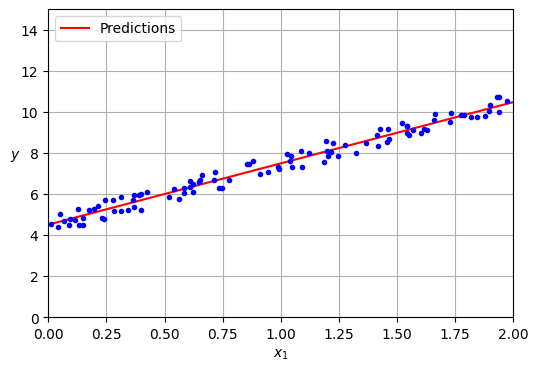

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")

plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)

print("Intercept:", lin_reg.intercept_)
print("Coefficients:", lin_reg.coef_)

Intercept: [4.51359766]
Coefficients: [[2.98323418]]


- intercept_: the bias term (θ₀).
- coef_: the weights for each feature (θ₁, θ₂, ..., θₙ).

In [9]:
lin_reg.predict(X_new)

array([[ 4.51359766],
       [10.48006601]])

The `LinearRegression` class is based on the `scipy.linalg.lstsq()` function (the name stands for `least squares`), which you could call directly:

**Least Squares Solver**

In [10]:
import numpy as np

theta_best, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
print("Theta from SVD-based solver:", theta_best)

Theta from SVD-based solver: [[4.51359766]
 [2.98323418]]


`np.linalg.lstsq()` is more robust than directly computing the normal equation θ = (XᵀX)⁻¹Xᵀy because it can handle:

- Non-invertible matrices (e.g., collinearity).
- High-dimensional data (m < n).

**Computing the Pseudoinverse Directly**

In [11]:
np.linalg.pinv(X_b) @ y

array([[4.51359766],
       [2.98323418]])

| Method                               | Pros                                            | Cons                                     |
| ------------------------------------ | ----------------------------------------------- | ---------------------------------------- |
| **Normal Equation** `θ = (XᵀX)⁻¹Xᵀy` | Fast for small datasets                         | Fails if `XᵀX` is singular               |
| **SVD / Pseudoinverse**              | Numerically stable, works for all `X`           | Slightly slower, more computational cost |
| **Gradient Descent**                 | Works for very large datasets or streaming data | Needs tuning of learning rate            |


**Computational Complexity of Linear Regression Methods**

| Method                               | Time Complexity             | Memory Usage | Best Use Case                                               |
| ------------------------------------ | --------------------------- | ------------ | ----------------------------------------------------------- |
| **Normal Equation** `θ = (XᵀX)⁻¹Xᵀy` | O(n³)                       | Moderate     | Small to medium number of features                          |
| **SVD (e.g., `np.linalg.lstsq`)**    | O(n²m) or \~O(n²)           | Moderate     | More stable than Normal Equation, handles multicollinearity |
| **Gradient Descent**                 | O(knm) where k = iterations | Low          | Large n or m; when data doesn't fit in memory               |


**Which One Should You Use?**

Ask yourself:

- How many features (n) and instances (m) do I have?
- Can my dataset fit in memory?
- Do I expect collinearity or noise?
- Do I need real-time or online updates?

When you’re working with small- to medium-sized datasets (up to ~10,000 features), use SVD-based linear regression for robustness. But when you start pushing into 100K+ features or millions of rows, switch to stochastic or mini-batch gradient descent to stay memory-efficient.

The big mistake I see people make is using the Normal Equation blindly — don’t do that with modern datasets. It’s elegant but rarely scalable.

# Gradient Descent
**What Is Gradient Descent?**

Gradient Descent is an optimization algorithm used to **minimize a cost function** by iteratively updating parameters. Think of it as walking downhill to reach the lowest point (minimum) using just your sense of slope.

How It Works

- Start with random parameters (θ).
- Compute the gradient – i.e., the slope of the cost function.
- Take a step in the opposite direction of the gradient (to reduce the cost).
- Repeat until:

        Gradient is (almost) zero → you’ve found a minimum.

        Or, max iterations reached.

**The Learning Rate Issues:**

The learning rate (α) controls how big each step is:
- Just right → Fast and stable convergence.
- Too small → Slow progress.
- Too large → Might overshoot, diverge, or bounce around endlessly.

Example:
If you're minimizing Mean Squared Error (MSE) in linear regression:
- Small α = 0.0001 might take 10,000+ steps.
- Large α = 1.0 could never converge.

آNotes:
1. Local Minima and Plateaus

Not all cost functions are nice and bowl-shaped. In non-convex functions:
- You might get stuck in a local minimum.
- You could plateau for a long time.

2. Feature Scaling

you should ensure that all features have a similar scale

If features are on very different scales:
- Gradient Descent zigzags inefficiently.
- Fix: Use StandardScaler or MinMaxScaler to normalize features.

4. High Dimensionality

As parameter count increases:
- The parameter space becomes huge (e.g., 300 dimensions).
- Optimization becomes harder.

Convex functions like MSE for linear regression are simpler—only one global minimum exists.

**For Effective Gradient Descent**

- Use random initialization
- Choose a reasonable learning rate
- Scale your features (e.g., StandardScaler)
- Use a convex cost function when possible
- Monitor cost and gradient magnitudes
- Apply early stopping to avoid overfitting

## Batch Gradient Descent
It calculates the gradient of the cost (loss) using all training examples at each step, So it called “batch”.

1. Compute the gradient
For mean squared error (MSE), the gradient w.r.t. parameters θ is:

*******************picc****************

This gives the direction of steepest ascent (increasing cost).

2. Update parameters
You move downhill (to minimize), so subtract the gradient scaled by learning rate η:


θnew=θ−η∇θ MSE(θ)

4. Repeat for each epoch

One epoch means one full pass over the dataset

In [12]:
eta = 0.1 # learning rate
n_epochs = 1000
m = len(X_b) # number of instances

np.random.seed(42)

theta = np.random.randn(2, 1) # randomly initialized model parameters
for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [13]:
theta

array([[4.51359766],
       [2.98323418]])

**Key factors**

Learning rate (η)
- Too small → painfully slow convergence
- Just right → fast and stable convergence
- Too large → overshoot and divergence

Epochs
- Too few → no convergence
- Too many → waste of time after convergence
- Smart trick: Stop early when the gradient’s norm < ε (tiny tolerance).

Convergence
- Guarantee for convex cost functions like MSE
- But converging precision improves slowly—improving 10× precision may cost 10× more iterations.

Batch Gradient Descent is easy to implement and works reliably for many problems but it can be slow on large datasets,
So that you can: 
- Scaling your input features
- Tuning learning rate via grid search + early stopping (based on gradient norm)
- Monitoring convergence (loss & gradient norm)

This way, you capture the strengths of BGD while minimizing inefficiencies.

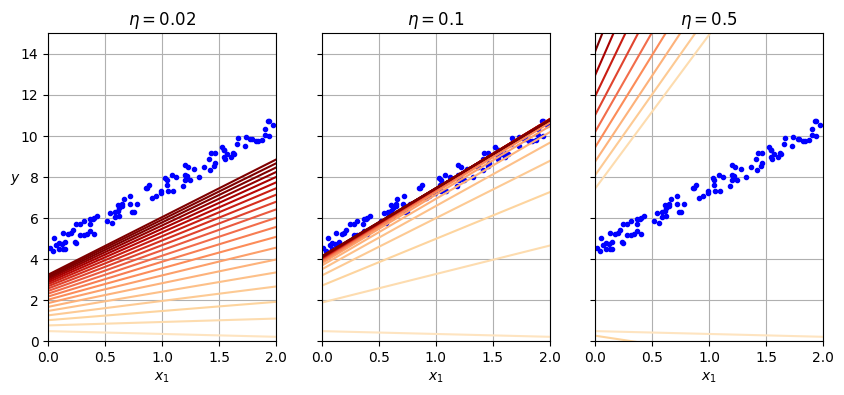

In [14]:
import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)
plt.show()

## Stochastic Gradient Descent (SGD):
- IT updates model parameters using one random instance per iteration rather than the whole dataset. This approach dramatically boosts speed and memory efficiency for large datasets—but introduces noise in the trajectory

| Feature                        | **Batch Gradient Descent**         | **Stochastic Gradient Descent (SGD)** |
| ------------------------------ | ---------------------------------- | ------------------------------------- |
| **Gradient Computation**       | Whole training set                 | One random instance                   |
| **Speed per step**             | Slow                               | Very fast                             |
| **Convergence path**           | Smooth and steady                  | Noisy and irregular                   |
| **Memory requirement**         | High (entire dataset in memory)    | Low (one instance at a time)          |
| **Risk of local minima**       | Higher in non-convex cost surfaces | Lower due to randomness               |
| **Suitability for large data** | Poor                               | Excellent                             |


How SGD Works

    Pick a random sample (xi,yi)(xi​,yi​).

    Compute the gradient of loss at that instance, e.g. for MSE:
    ∇J=2 xi⊤(xiθ−yi)
    ∇J=2xi⊤​(xi​θ−yi​)

    Update:
    θ←θ−η∇J
    θ←θ−η∇J
    This update is noisy—on average, it heads toward the global minimum

| Pros                                                              | Cons                                                                                            |
| ------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------- |
| Fast updates & handles large datasets efficiently                   | Noise causes parameters to *bounce* around the minimum                                             |
| Can "escape" shallow local minima thanks to randomness              | Doesn’t converge exactly—settles near-optimal |
| Works well in high dimensions and streaming or out-of-core contexts | Requires careful tuning of the **learning rate schedule**                                          |

[1]: https://kinder-chen.medium.com/stochastic-gradient-descent-9c5a76e68fc?utm_source=chatgpt.com "Stochastic Gradient Descent - Kinder Chen - Medium"
[2]: https://en.wikipedia.org/wiki/Stochastic_gradient_descent?utm_source=chatgpt.com "Stochastic gradient descent"


How to Balance Randomness and Convergence?

    using randomness
    
Why is randomness useful?

    It helps escape local minima. For example, in a non-convex loss surface, SGD can “jump out” of a local valley, unlike batch GD which might get stuck.

Why is randomness a problem?

    It causes the cost function to bounce around the global minimum.

    The algorithm never really settles unless you control the step size.

**The learning schedule:** is a Function that determines the learning rate at each iteration.

It starts with larger steps (exploration) and slowly switches to smaller steps (fine-tuning).

In [15]:
theta_path_sgd = []

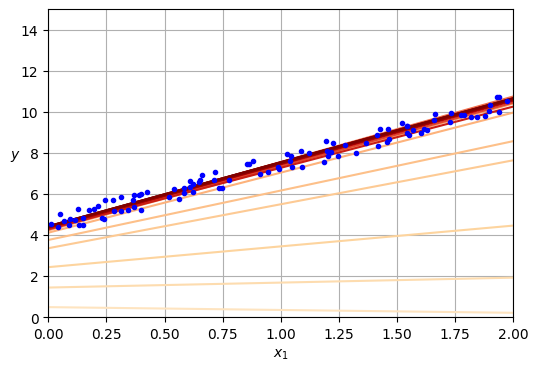

In [16]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

n_shown = 20  # extra code – just needed to generate the figure below
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting

for epoch in range(n_epochs):
    for iteration in range(m):

        # extra code – these 4 lines are used to generate the figure
        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, color=color)

        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

In [17]:
theta

array([[4.51548062],
       [2.9775157 ]])

**Crucial Rule: Data Must Be IID**

Stochastic gradient descent assumes your data is:

    Independent: one sample doesn’t depend on another.

    Identically Distributed: from the same probability distribution.

Why does this matter?

If your data is sorted by label or time, SGD will:

    First optimize for one pattern (e.g., all “cat” images).

    Then switch to another (e.g., all “dog” images).

    This causes poor convergence and unstable weights.

Always shuffle your data before training.

**For Using SGD in Projects**

Use when:

- You have a large dataset
- You need to train quickly or stream data
- You deal with non-convex loss surfaces (like in deep learning)

Steps:
- Choose a learning rate schedule that starts high and decays gradually.
- Use `np.random.seed()` for reproducibility.
- Shuffle your training data (especially if it’s sorted).
- Monitor convergence visually or log loss values to check bouncing behavior.

**How to perform linear regression using Stochastic Gradient Descent (SGD)**

Using Scikit-Learn's `SGDRegressor`

In [18]:
from sklearn.linear_model import SGDRegressor

In [19]:
sgd_reg = SGDRegressor(
    max_iter=1000, 
    tol=1e-5, 
    penalty=None, 
    eta0=0.01,
    n_iter_no_change=100, 
    random_state=42
)

sgd_reg.fit(X, y.ravel())

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

- Trains for up to 1000 epochs
- Stops early if the loss stops improving by at least `1e-5` over 100 epochsd
- Uses a learning rate of 0.01 (via `eta0`)
- Has no regularization (`penalty=None`)

In [20]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.50316965]), array([2.99156535]))

| Parameter              | Description                                                       |
| ---------------------- | ----------------------------------------------------------------- |
| `max_iter=1000`        | Maximum number of epochs (complete passes over the data)          |
| `tol=1e-5`             | Minimum loss improvement to continue training                     |
| `n_iter_no_change=100` | Early stopping if no significant loss improvement over 100 epochs |
| `eta0=0.01`            | Initial learning rate                                             |
| `penalty=None`         | No L1 or L2 regularization                                        |
| `random_state=42`      | Makes results reproducible                                        |


**Partial Training with `partial_fit()`**

Use `partial_fit()` if:
- You receive data in batches or streams (online learning)
- You want fine-grained control over training

In [21]:
num_batches=10

Assume:

    X is your full feature matrix (e.g., shape (1000, 10))

    y is your label vector (e.g., shape (1000,) or (1000, 1))

In [22]:
X_batches = np.array_split(X, num_batches)
y_batches = np.array_split(y, num_batches)

for i in range(num_batches):

    sgd_reg.partial_fit(X_batch[i], y_batch[i])

**Continued Training with `warm_start=True`**

Use this when you want to resume training later without losing learned weights.

sgd_reg = SGDRegressor(warm_start=True, max_iter=1000, eta0=0.01)

sgd_reg.fit(X_train, y_train)  # first round

sgd_reg.fit(X_more, y_more)    # continues from previous weights

**Remember:**

`fit()` resets learning rate counters

`partial_fit()` does not

So choose depending on whether you want the schedule to restart or continue.

**Summery**

- Use feature scaling (e.g., StandardScaler) before training. SGD is sensitive to feature magnitudes.
- Monitor convergence using .score() or validation loss over epochs.

**When to Use `SGDRegressor`:**

It is Best For:

    Large datasets (millions of samples)

    Online or real-time training

    Incremental model updates

    When you want fast convergence, even if it’s slightly noisy

Avoid if:

    You need exact solutions (use normal equation or closed-form solution)

    Your dataset is very small

    You're not comfortable tuning learning rates and handling noise

# Mini-Batch Gradient Descent:
It's a practical and powerful compromise between Batch Gradient Descent and Stochastic Gradient Descent.
- It uses a small random subsets of the training data called mini-batches
- Each mini-batch contains 10–1000 samples (typical range: 32, 64, 128)

**Benefits of Mini-Batch GD**
- Faster convergence than full batch
- Less noisy than SGD
- Hardware-accelerated via vectorized matrix ops (especially on GPUs)
- Supports out-of-core training with large datasets
- Still flexible with learning rate scheduling

**Drawback?**
- Harder to escape local minima than SGD (less randomness).
- But this is not an issue for convex problems like linear regression with MSE.

| Feature            | **Batch GD**      | **Stochastic GD (SGD)** | **Mini-Batch GD**      |
| ------------------ | ----------------- | ----------------------- | ---------------------- |
| Uses how much data | All training data | 1 sample                | Small batch            |
| Speed              | Slow              | Very fast               | Fast                   |
| Memory use         | High              | Very low                | Moderate               |
| Noise in updates   | Low (smooth path) | High (bouncy path)      | Medium                 |
| Hardware benefits  | Poor              | Poor                    | **Excellent (GPU)** 🔥 |


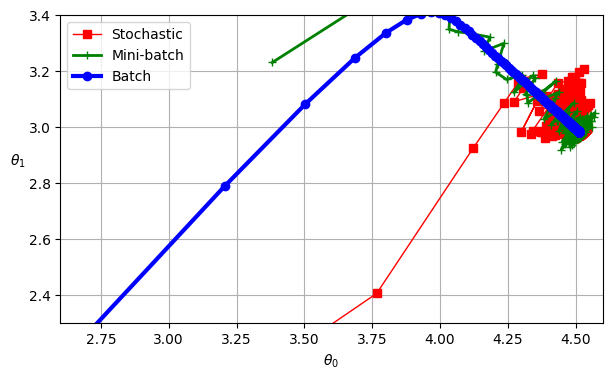

In [23]:
from math import ceil

n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

t0, t1 = 200, 1000  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta_path_mgd = []
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx : idx + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(iteration)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1,
         label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2,
         label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3,
         label="Batch")
plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$   ", rotation=0)
plt.axis([2.6, 4.6, 2.3, 3.4])
plt.grid()
plt.show()

**Visual Comparison**

Imagine the paths in parameter space:
- Batch GD: a smooth, direct descent → stops exactly at the minimum
- SGD: bouncy and erratic, continues to jump around near the minimum
- Mini-Batch GD: more stable than SGD, but still with small fluctuations

**Comparison of algorithms for linear regression**

| Algorithm         | Large `m` | Out-of-core | Large `n` | Hyperparams |
| ----------------- | --------- | ----------- | --------- | ----------- |
| Normal Equation   | ✅ Fast    | ❌ No        | ❌ Slow    | 0           |
| SVD               | ✅ Fast    | ❌ No        | ❌ Slow    | 0           |
| Batch GD          | ❌ Slow    | ❌ No        | ✅ Fast    | 2           |
| **Stochastic GD** | ✅ Fast    | ✅ Yes       | ✅ Fast    | ≥2          |
| **Mini-Batch GD** | ✅ Fast    | ✅ Yes       | ✅ Fast    | ≥2          |


There is almost no difference after training: all these algorithms end up with very similar models and make predictions in exactly the same way.

All reach similar solutions for linear regression. But their **training time, memory use, and hardware support** differ significantly.

**Mini-Batch GD** is the sweet spot in practice—especially for deep learning and large-scale linear models. You get speed, scalability, and stable convergence, especially when paired with GPU acceleration. I recommend it as your default for most training tasks unless your dataset is tiny.

# Polynomial Regression
Is a technique where you transform your input features into polynomial features, allowing a linear model to learn nonlinear patterns. 

    you can use a linear model to fit nonlinear data

In [24]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

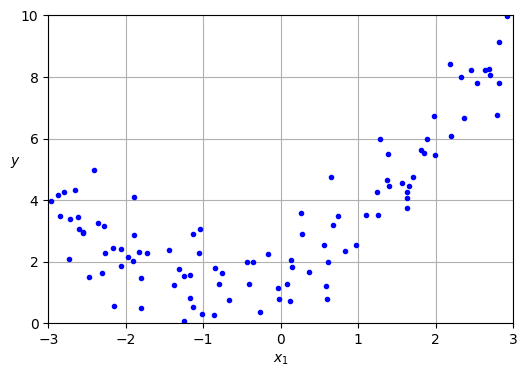

In [25]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

Straight line will never fit this data properly. So let’s use Scikit-Learn’s `PolynomialFeatures` class to transform our training data, adding the square (second-degree polynomial) of each feature in the training set as a new feature.

**How to do it in Scikit‑Learn**

1. Create polynomial features:

In [26]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

For degree `d` and one feature `x`, this adds `x, x², …, xⁿ` 

In [27]:
X_poly[0]

array([-0.75275929,  0.56664654])

`X_poly` now contains the original feature of X plus the square of this feature.

2. Fit a linear regression model on `X_poly`:

In [28]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [29]:
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

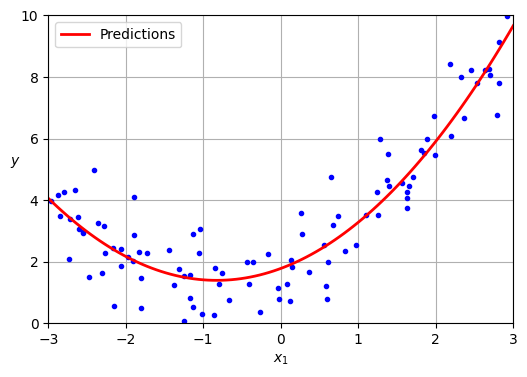

In [30]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

**Feature interactions with multiple inputs**

With several features, say `x₁` and `x₂`, PolynomialFeatures(degree=2) adds terms like:

`x₁²`, `x₂²`, and the interaction term `x₁·x₂`

This expands the feature space to provide flexibility in capturing complex relationships.

**Beware of combinatorial explosion**

Number of features grows as

`(n + d)! / (n!·d!)` where `n` is input features and `d` degree

Higher degrees can lead to **overfitting** and unnecessary complexity.

# Learning Curves

Are a powerful tool to decide whether your model is too simple (underfitting) or too complex (overfitting)—especially when tweaking something like polynomial degree.

It plots model performance (like MSE) on both:

- Training data,
- and Validation data

| Scenario         | Training Error | Validation Error | What It Means                                                                      |
| ---------------- | -------------- | ---------------- | ---------------------------------------------------------------------------------- |
| **Underfitting** | High, flat     | High, flat       | Model too simple (high bias). Adding data or complexity helps). |
| **Overfitting**  | Low            | High (large gap) | Model too complex (high variance). Need more data or simplify .                    |
| **Good fit**     | Low & close    | Low & close      | Just right. Both errors converge .                                                 |



| Condition   | Training Error | Validation Error | Diagnosis    | Fixes                               |
| ----------- | -------------- | ---------------- | ------------ | ----------------------------------- |
| High + High | ❌              | ❌                | Underfitting | Add features, increase degree       |
| Low + High  | ✅              | ❌                | Overfitting  | Lower degree, regularize, more data |
| Low + Low   | ✅              | ✅                | Good Fit     | ✅                                   |

Use cross-validation (e.g. `cross_val_score`) to get a good estimate of validation error.

### High-degree polynomial regression

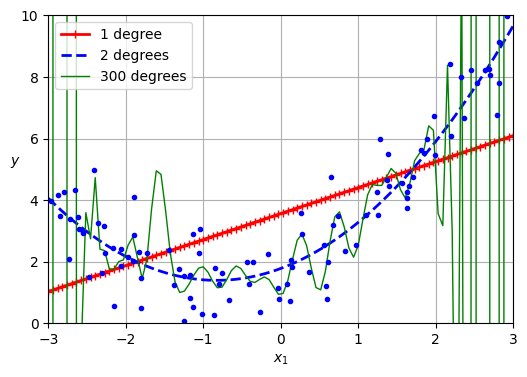

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(6, 4))

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 300)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

Example: Polynomial Degrees

    Degree = 1:
    ➝ High training & val error; curves flat and close → underfitting.

    Degree = 10+:
    ➝ Training error low, validation error high → overfitting; 
    
    Degree = 2–3:
    ➝ Both errors low and close—optimal model for quadratic data

**What Learning Curves Tell You**

Learning curves plot training error and validation error as you increase the number of training samples.
- Training error: How well the model fits the data it’s trained on.
- Validation error: How well the model generalizes to unseen data.

You typically want:
- Training error low
- Validation error converging close to training error

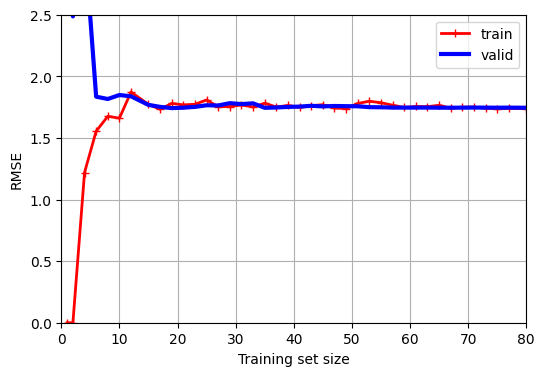

In [32]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

# extra code – beautifies and saves Figure 4–15
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])

plt.show()

This model is **underfitting**. To see why, first let’s look at the training error. When there are just one or two instances in the training set, the model can fit them perfectly, which is why the curve starts at zero. But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly.

**Why More Data Won’t Help**

"If your model is underfitting the training data, **adding more training examples will not help.**"

    When a model underfits, the problem isn't about having too little data
And More Data Doesn't Help Underfitting

Why?

- The model is not complex enough (Model Complexity is Too Low)
- Wrong Model Assumptions

      Some models assume:

        Linearity

        Independence of features

        Normal distribution of errors

    If these assumptions don’t match the real data, the model will underfit — no matter how much data is added.

- No New Knowledge is Gained

    More data won’t improve understanding if the model is incapable of learning.

    The model just continues making the same mistakes, but more often.

**So, Adding more data doesn't add new knowledge—it just repeats that failure.**

Because Underfitting happens when your model is:
- Too simple to capture the underlying patterns in the data
- Performing poorly on both training and test data
- Not learning enough — it's like a student who didn’t study enough

**How to Fix Underfitting**
| Fix                             | Explanation                                                                                  |
| ------------------------------- | -------------------------------------------------------------------------------------------- |
|**Use a more complex model** | Try models with more capacity (e.g. Polynomial Regression, Random Forests, Deep Neural Nets) |
|**Train longer**              | Some models need more iterations or epochs to learn effectively                              |
|**Add or engineer features**  | Add nonlinear features like $x^2$, $x \cdot y$, or domain-specific transformations           |
|**Reduce regularization**    | If you're using L1/L2, try lowering regularization strength (alpha or lambda)                |
|**Tune hyperparameters**     | Adjust settings like depth of trees, number of neurons, or learning rate                     |


In [33]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

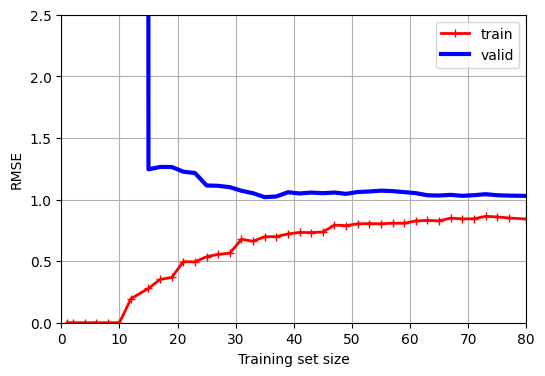

In [34]:
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])
plt.show()

**What the Learning Curves Show**

**Training Error: Low**

    The model fits the training data very well.

    Overly flexible, it captures even the noise.

**Validation Error: Higher, with a noticeable gap**

    The model doesn’t generalize well.

    It overfits small quirks of the training data.

This gap is a classic sign of **overfitting.**

**How to Fix Overfitting**

More training data helps.

    Why? With more data, the model has less chance to memorize the noise.

    The variance decreases.

    The gap between training and validation errors shrinks.

This works best when:

    The data truly reflects the underlying distribution.

    The model isn't insanely complex (e.g., 300-degree polynomial would still be excessive).

| Fix                          | Explanation                                                                                             |
| ---------------------------- | ------------------------------------------------------------------------------------------------------- |
| **Use a simpler model**      | Reduce model complexity: e.g., lower polynomial degree, fewer layers, smaller trees                     |
| **Add more training data**   | More examples help the model generalize better and reduce sensitivity to noise                          |
| **Use regularization**       | Apply L1 (Lasso) or L2 (Ridge) penalties to limit over-flexible models                                  |
| **Reduce training time**     | Stop training early before the model memorizes the data (use early stopping)                            |
| **Use cross-validation**     | Helps detect overfitting and tune hyperparameters more reliably                                         |
| **Drop irrelevant features** | Remove noisy or redundant inputs that cause the model to chase patterns that don't generalize           |
| **Apply data augmentation**  | For image, text, or signal data, generate new data points from existing ones (e.g., flipping, rotating) |
| **Use ensemble methods**     | Combine weaker learners (like in Random Forests, Bagging) to reduce variance                            |


One way to improve an overfitting model is to feed it more training data **until the validation error reaches the training error**.


**The Bias–Variance Trade-Off**

| Component       | Meaning                                                      |
| --------------- | ------------------------------------------------------------ |
| **Bias**        | Error from wrong assumptions (e.g., assuming linearity).     |
| **Variance**    | Error from model sensitivity to noise.                       |
| **Irreducible** | Noise in data you *can’t fix* without cleaning data sources. |


**Rules of Thumb**
| Increase Model Complexity | ➝ Lower Bias, Higher Variance |
| ------------------------- | ----------------------------- |
| Decrease Model Complexity | ➝ Higher Bias, Lower Variance |

Your job is to find the balance.

**What to Do When You See Overfitting**
    
If Training Error < Validation Error:

1. More data
2. Simpler model (e.g., reduce polynomial degree from 10 to 3–5)
3. Regularization:

   Ridge Regression: penalizes large weights

   Lasso Regression: can also reduce irrelevant features to zero

**what typical learning curve shapes look like**

| Type         | Shape of Curves                  | Gap     | Fix                    |
| ------------ | -------------------------------- | ------- | ---------------------- |
| Underfitting | Both curves high, close together | No Gap       | More complexity        |
| Overfitting  | Training low, validation high    | Big   | More data, regularize  |
| Good Fit     | Both low and converging          | Small | Nothing or fine-tuning |

# Regularized Linear Models
It helps to reduce overfitting and improve model generalization

**Why Regularize a Model?**

When a model overfits, it captures noise along with the signal. Regularization helps prevent this by:
- Reducing the model’s complexity (fewer degrees of freedom).
- Constraining the size of the weights.

This makes the model more robust on unseen data.

**Regularization in Polynomial vs Linear Models**

🔸 Polynomial Models

    Regularization = Reduce polynomial degree.

    Example: Instead of fitting a 10th-degree polynomial, try 2nd or 3rd.

🔸 Linear Models

    Regularization = Penalize large weights using a regularization term in the loss function.

| Method          | Regularization Type  | Good For                             |
| --------------- | -------------------- | ------------------------------------ |
| **Ridge**       | L2 (squared weights) | Shrinking weights evenly             |
| **Lasso**       | L1 (absolute values) | Feature selection (some weights = 0) |
| **Elastic Net** | L1 + L2 combined     | Balance between Ridge and Lasso      |


WARNING: **Always Scale Your Data Before Using Ridge, Lasso, or Elastic Net Regression**

Regularized models like **Ridge**, **Lasso**, and **ElasticNet** are highly sensitive to the scale of input features. If your features aren't scaled, the model might assign **unfairly large penalties** to some coefficients, especially for features with large numeric ranges. This leads to:

- Poor convergence: Gradient descent takes longer or fails to converge.
- Biased coefficients: Features with large numeric ranges dominate the penalty.
- Suboptimal predictions: Model performance drops significantly.
- Misleading feature selection: Lasso or ElasticNet might zero out the wrong features.

## Ridge Regression
Ridge Regression is a **regularized version of Linear Regression** that **adds a penalty for large weights**. This helps prevent overfitting, especially when working with **many correlated features or noisy data**.

**pic**


Equation 4-8. Ridge Regression cost function
J θ = MSE θ + α
1
2
∑i = 1
n
θi
2

- `MSE(θ)` is the mean squared error.
- `α` (alpha) is the **regularization strength**.
- The sum starts at `i = 1` (bias term `θ₀` **is not regularized**).

This penalty is called **L2 regularization**, and it discourages large weights by penalizing the **squared magnitude** of the weights.

**When to Use Ridge Regression**

Use Ridge Regression if:
- You have **many features**.
- Features are **correlated** (multicollinearity).
- You want to **reduce model variance** and **increase generalization**.

**Trade-off: Bias vs Variance**
- **Low α**: Almost standard Linear Regression → low bias, high variance.
- **High α**: Heavier regularization → higher bias, lower variance.

Find the sweet spot using **cross-validation**.

**Generate a very small and noisy linear dataset**

In [36]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

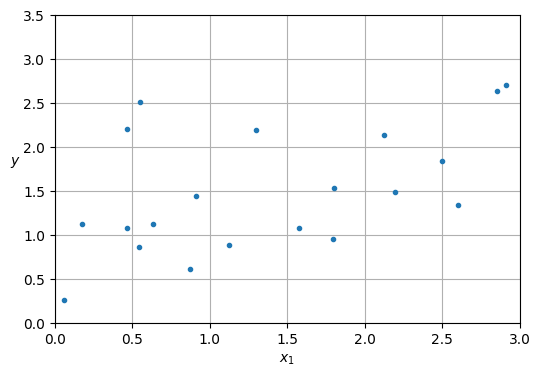

In [37]:
# quick peek at the dataset we just generated
plt.figure(figsize=(6, 4))
plt.plot(X, y, ".")
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)
plt.axis([0, 3, 0, 3.5])
plt.grid()
plt.show()

How to perform **Ridge Regression** using both the **closed-form solution** and **stochastic gradient descent (SGD)** with Scikit-Learn

**1. Ridge Regression with the Closed-form Solution**

In [39]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.55325833]])

- `Ridge(alpha=0.1)`: Creates a Ridge Regression model with **regularization strength** α = 0.1.
- `solver="cholesky"`: Uses the **Cholesky decomposition**, a fast method for solving linear systems.
- `fit(X, y)`: Trains the model on the dataset.
- `predict([[1.5]])`: Predicts the output value for `x = 1.5`.

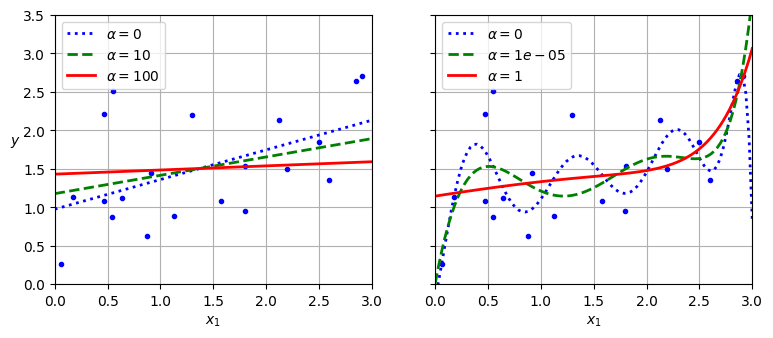

In [41]:
def plot_model(model_class, polynomial, alphas, **model_kwargs):
    plt.plot(X, y, "b.", linewidth=3)
    for alpha, style in zip(alphas, ("b:", "g--", "r-")):
        if alpha > 0:
            model = model_class(alpha, **model_kwargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler(),
                model)
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, linewidth=2,
                 label=fr"$\alpha = {alpha}$")
    plt.legend(loc="upper left")
    plt.xlabel("$x_1$")
    plt.axis([0, 3, 0, 3.5])
    plt.grid()

plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])

plt.show()

**2. Ridge Regression with stochastic gradient descent(SGD)**

In [43]:
sgd_reg = SGDRegressor(
    penalty="l2",   # L2 = Ridge
    alpha=0.1 / m,  # manually divide by m
    tol=None,
    max_iter=1000, 
    eta0=0.01, 
    random_state=42
)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets (flattens y to 1D)
sgd_reg.predict([[1.5]])

array([1.55302613])

- `penalty="l2"`: Adds L2 regularization (i.e., Ridge).
- `alpha=0.1 / m`: We divide manually by `m` because `SGDRegressor` doesn’t do it internally.
- `tol=None`: Disables early stopping based on tolerance.
- `max_iter=1000`: Maximum number of iterations.
- `eta0=0.01`: Initial learning rate.
- `y.ravel()`: Converts target `y` from a 2D to a 1D array (required by `SGDRegressor`).

| Aspect         | `Ridge`                | `SGDRegressor`              |
| -------------- | ---------------------- | --------------------------- |
| Solving method | Closed-form (exact)    | Iterative (approximate)     |
| Speed          | Fast on small datasets | Scalable for large data     |
| Accuracy       | More precise           | Can vary based on settings  |
| Regularization | Built-in (`alpha`)     | Must scale `alpha` manually |


**Ridge Regression using the sag Solver**

In [44]:
ridge_reg = Ridge(alpha=0.1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55326019]])

- `solver="sag"`: Uses Stochastic Average Gradient, an efficient iterative solver for **large datasets**.
- It's faster than the closed-form when the dataset is large and sparse.
- Works only with `standardized data`, so ideally the input `X` should be scaled (but this example skips it for simplicity).
- `predict([[1.5]])`: Makes a prediction for input `x = 1.5`.

Result: Should be very close to the prediction from the earlier Ridge and SGD examples.

In [46]:
ridge_reg.intercept_, ridge_reg.coef_

(array([0.97896386]), array([[0.38286422]]))

**Ridge Regression Using the Closed-Form Solution (Manual)**

In [45]:
alpha = 0.1
A = np.array([[0., 0.], [0., 1.]])
X_b = np.c_[np.ones(m), X]
np.linalg.inv(X_b.T @ X_b + alpha * A) @ X_b.T @ y

array([[0.97898394],
       [0.3828496 ]])

- `X_b`: Adds a bias column (ones) to the input matrix → shape becomes (20, 2).
- `A`: Regularization matrix. It's the identity matrix except that the top-left (bias term) is 0 (so it is not regularized).
- This is a direct implementation of the Ridge Regression closed-form formula



- `np.linalg.inv(...) @ ...`: Solves for the weights manually.

Output: A 2D vector like `[[bias], [coefficient]]`

| Method              | Speed     | Accuracy    | When to Use                       |
| ------------------- | --------- | ----------- | --------------------------------- |
| `solver="cholesky"` | Fast      | Exact       | Small to medium datasets          |
| `solver="sag"`      | Very fast | Approximate | Large datasets with many features |
| Manual formula      | N/A       | Exact       | Educational and verification use  |


**RidgeCV for Automatic α Tuning**

In [47]:
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0], cv=5)
ridge_cv.fit(X, y)
ridge_cv.alpha_  # Best alpha found via cross-validation

10.0

- `RidgeCV` = Ridge with **built-in cross-validation**.
- Much faster than `GridSearchCV` for Ridge problems.
- Use this if you're not sure which α value to choose.

Also:
- `LassoCV` for Lasso Regression
- `ElasticNetCV` for ElasticNet

## Lasso Regression

Lasso stands for **Least Absolute Shrinkage** and **Selection Operator**. Like Ridge Regression, it **adds a penalty** to the Linear Regression cost function to **reduce model complexity and prevent overfitting**.

🔍 Cost Function:
**pic**

J(θ)=MSE(θ)+2α∑i=1n∣θi∣
J(θ)=MSE(θ)+2αi=1∑n​∣θi​∣

- **MSE** is the mean squared error (prediction error).
- **2α∑|θᵢ|** is the L1 regularization term.
- L1 penalty forces **some weights to be exactly zero** → automatic feature selection.

| Feature           | Lasso (L1)               | Ridge (L2)                |   |      |
| ----------------- | ------------------------ | ------------------------- | - | ---- |
| Penalty           | ∑                        | θᵢ                        |   |  |
| Feature Selection | (can zero out weights) | (keeps all weights)     |   |      |
| Output            | Sparse model             | All features retained     |   |      |
| Good For          | Few important features   | Many small/medium effects |   |      |
| Optimization      | Slower convergence       | Smooth convergence        |   |      |


Tip: If you're not sure, try ElasticNet, which combines both L1 and L2 penalties.

In [48]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

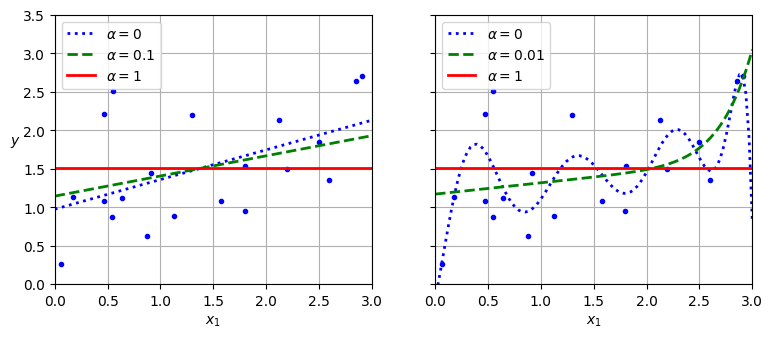

In [49]:
plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 1e-2, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])

plt.show()

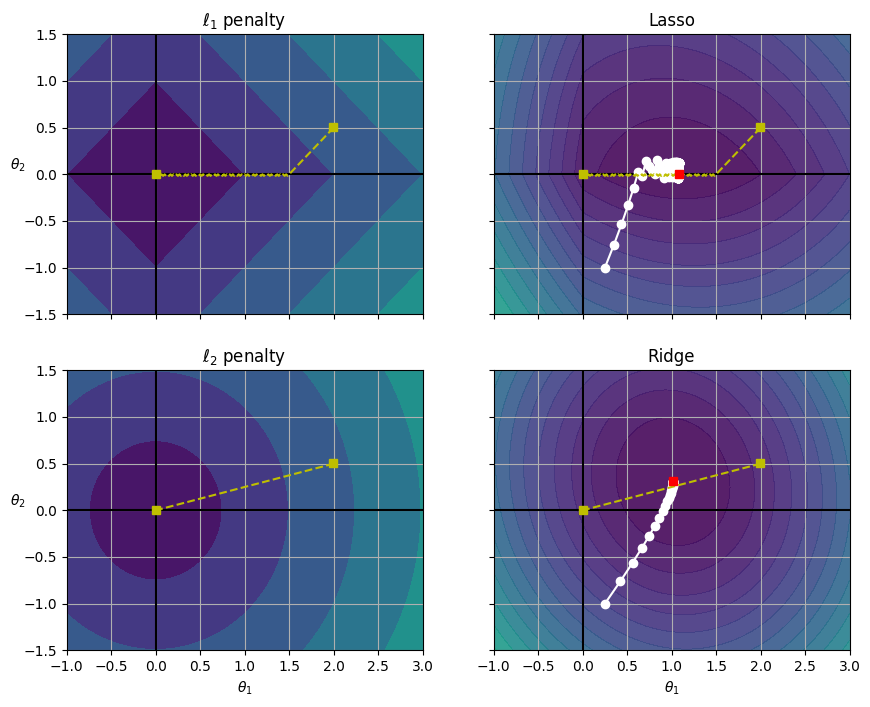

In [50]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1 / len(Xr) * ((T @ Xr.T - yr.T) ** 2).sum(axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(J.argmin(), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

def bgd_path(theta, X, y, l1, l2, core=1, eta=0.05, n_iterations=200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = (core * 2 / len(X) * X.T @ (X @ theta - y)
                     + l1 * np.sign(theta) + l2 * theta)
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))

for i, N, l1, l2, title in ((0, N1, 2.0, 0, "Lasso"), (1, N2, 0, 2.0, "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2 ** 2

    tr_min_idx = np.unravel_index(JR.argmin(), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levels = np.exp(np.linspace(0, 1, 20)) - 1
    levelsJ = levels * (J.max() - J.min()) + J.min()
    levelsJR = levels * (JR.max() - JR.min()) + JR.min()
    levelsN = np.linspace(0, N.max(), 10)

    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(theta=np.array([[2.0], [0.5]]), X=Xr, y=yr,
                      l1=np.sign(l1) / 3, l2=np.sign(l2), core=0)
    ax = axes[i, 0]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, N / 2.0, levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(fr"$\ell_{i + 1}$ penalty")
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")
    ax.set_ylabel(r"$\theta_2$", rotation=0)

    ax = axes[i, 1]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")

plt.show()

**Or use SGDRegressor for large datasets**

In [52]:
from sklearn.linear_model import SGDRegressor

sgd_lasso = SGDRegressor(penalty="l1", alpha=0.1)
sgd_lasso.fit(X, y)

/home/ahmedabdulghany/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.1, penalty='l1')

## Elastic Net

**Elastic Net Regression** is a middle ground between ridge regression and lasso regression and **combines the strengths** of Ridge (L2) and Lasso (L1) regression. It's especially useful when:
- You expect **some irrelevant features** (Lasso's strength).
- You expect **strongly correlated features** (Ridge handles this better).
- You need a **balanced, stable model** that avoids Lasso’s quirks and Ridge’s inflexibility.

**Elastic Net Cost Function**

**pic**

J(θ)=MSE(θ)+r⋅2α∑i=1n∣θi∣+(1−r)⋅αm∑i=1nθi2
J(θ)=MSE(θ)+r⋅2αi=1∑n​∣θi​∣+(1−r)⋅mα​i=1∑n​θi2​

Where:
- `MSE(θ)`: Mean squared error (fit to the data).
- `r`: mix ratio between Lasso (L1) and Ridge (L2).

    - `r = 1`: pure Lasso.
    - `r = 0`: pure Ridge.

- `α`: regularization strength.

- `m`: number of training samples.

| Situation                               | Recommended Model           |
| --------------------------------------- | --------------------------- |
| Few important features, many irrelevant | **Lasso** or **ElasticNet** |
| All features likely contribute          | **Ridge**                   |
| Many correlated features                | **ElasticNet**              |
| More features than samples              | **ElasticNet** or **Ridge** |
| Fast prototyping, baseline              | **Ridge**                   |
| No regularization needed (rare!)        | Linear Regression           |


In real-world scenarios, **ElasticNet** is often preferred because it offers flexibility and stability.

In [53]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

`l1_ratio=0.5` → 50% Lasso, 50% Ridge

`alpha=0.1` → overall regularization strength

## Early Stopping

**What is Early Stopping?**

Early stopping is a **regularization technique** for training models like neural networks or polynomial regressors. Instead of training until a set number of epochs, **you stop training when the validation error stops improving**.

**Why it works**: As training progresses, your model learns better patterns. But if you train too long, it starts overfitting — performing well on training data but poorly on unseen data. Early stopping prevents this.

**Step-by-Step: How Early Stopping Works**

1- Train your model in epochs (one epoch = one full pass over training data).

2- Track the error on a validation set after each epoch (commonly RMSE or loss).

3- Save the model when validation error hits a new minimum.

4- If the error stops improving, wait a few more epochs (called patience).

5- If the error stays worse for those epochs, stop training and roll back to the best model.

**Warning**: In recent versions of Scikit-Learn, you must use `root_mean_squared_error()` to compute the RMSE, instead of `mean_squared_error(labels, predictions, squared=False)`. The following `try`/`except` block tries to import `root_mean_squared_error`, and if it fails it just defines it.

In [54]:
try:
    from sklearn.metrics import root_mean_squared_error
except ImportError:
    from sklearn.metrics import mean_squared_error

    def root_mean_squared_error(labels, predictions):
        return mean_squared_error(labels, predictions, squared=False)

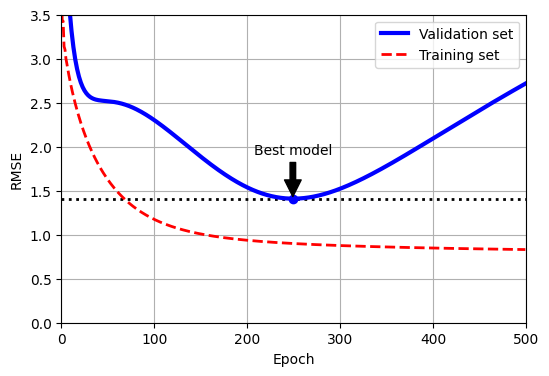

In [56]:
from copy import deepcopy
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                              StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')
train_errors, val_errors = [], []  # extra code – it's for the figure below

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = root_mean_squared_error(y_valid, y_valid_predict)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

    # extra code – we evaluate the train error and save it for the figure
    y_train_predict = sgd_reg.predict(X_train_prep)
    train_error = root_mean_squared_error(y_train, y_train_predict)
    val_errors.append(val_error)
    train_errors.append(train_error)

best_epoch = np.argmin(val_errors)
plt.figure(figsize=(6, 4))
plt.annotate('Best model',
             xy=(best_epoch, best_valid_rmse),
             xytext=(best_epoch, best_valid_rmse + 0.5),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], "k:", linewidth=2)
plt.plot(val_errors, "b-", linewidth=3, label="Validation set")
plt.plot(best_epoch, best_valid_rmse, "bo")
plt.plot(train_errors, "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.axis([0, n_epochs, 0, 3.5])
plt.grid()

plt.show()

`partial_fit()` enables incremental learning, good for early stopping.

`deepcopy()` saves both the structure and learned weights.

`SGDRegressor(penalty=None)` disables built-in regularization, isolating the effect of early stopping.

**What the Code Does**

---

1- Preprocessing

- It **adds polynomial features** (degree = 90, so it's very complex).
- Then it **scales the features** using `StandardScaler` to improve gradient descent efficiency.

---

2- Validation Set

- The data is already split into:
  - `X_train`, `y_train` (training set)
  - `X_valid`, `y_valid` (validation set)
- This is critical because **early stopping depends on a validation set** that the model **never sees during training**.

---

3- Model Setup

- The model used is `SGDRegressor`, configured as follows:
  - `penalty=None` → disables regularization like L2 or L1.
  - `eta0=0.002` → sets a **small learning rate** to ensure **slow and stable learning**.
  - `random_state=42` → ensures reproducibility.

---

4- Training with Early Stopping Logic

- It uses `.partial_fit()` instead of `.fit()`:
  - `.partial_fit()` enables **incremental learning**, training one batch at a time — ideal for early stopping.
- After each epoch:
  - Predicts on the validation set.
  - Computes **validation RMSE** (Root Mean Squared Error).
  - If RMSE is the **lowest seen so far**, it saves a copy of the model.

---

5- Saving the Best Model

- `copy.deepcopy()` saves **everything** about the model:
  - Weights
  - Training state
  - Hyperparameters

> `sklearn.base.clone()` will **not** work here — it only copies the model's **hyperparameters**, not the learned weights or internal state.

---

6- No Actual Early Stopping in This Code

- It trains for **all 500 epochs**, regardless of performance.
- But it **stores the best version**, so you can **revert to it after training ends**.

---

**Real-World Example**
Imagine training a neural network for image classification:
- Validation accuracy improves until epoch 25.
- After that, it starts dropping while training accuracy keeps rising.
- Early stopping at epoch 25 saves you from overfitting and saves compute time.

**Alternatives & Complements to Early Stopping**

| Technique         | What it Does             | Combine with Early Stopping? |
| ----------------- | ------------------------ | ---------------------------- |
| L2 Regularization | Penalizes large weights  | Yes                        |
| Dropout           | Randomly drops neurons   | Yes                        |
| Data Augmentation | Expands training data    | Yes                        |
| Cross-Validation  | More reliable validation | Yes                        |


# Logistic Regression

**What is Logistic Regression?**

- Logistic Regression is a **classification algorithm**, despite its name.
- It is used to **predict probabilities** that an instance belongs to a class.
- Common use: **spam detection**, **medical diagnosis**, **fraud detection**, etc.

---

**Key Concept**

- The model **outputs a probability** between 0 and 1.
- If the **probability > 0.5**, it predicts class **1** (positive class).
- Otherwise, it predicts class **0** (negative class).

> Example:
> - If `P(spam | email) = 0.76`, then the email is classified as **spam**.
> - If `P(spam | email) = 0.42`, then it’s **not spam**.

---

**How Does It Work?**

1- Logistic Regression computes a **linear combination of features** just like Linear Regression:
  
  \[
  z = \theta^T x
  \]

2- Then it applies the **sigmoid function** to map the result into a probability:

  \[
  \hat{p} = \frac{1}{1 + e^{-z}}
  \]

3- The output \(\hat{p}\) is the **predicted probability** of belonging to class 1.

---

**Binary Classifier**

- **Two-class classification**:
  - Class 0 → Negative class
  - Class 1 → Positive class
- If you want **multi-class classification**, you'd use extensions like:
  - **One-vs-Rest (OvR)**
  - **Softmax Regression** (multinomial logistic regression)

## Estimating Probabilities

**Logistic regression model**

**Step 1: Compute the Weighted Sum (Linear Score) of the input features (plus a bias term)**

Like linear regression, logistic regression starts by computing a **linear combination** of the input features:

\[
t = \theta^T x = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n
\]

- Here, **θ** are the model's weights (including bias), and **x** is the input feature vector.
- The result \( t \) is often called the **logit** or **score**.

**Step 2: Apply the Logistic (Sigmoid) Function**

The **sigmoid function** transforms the score \( t \) into a probability:

\[
\hat{p} = \sigma(t) = \frac{1}{1 + e^{-t}}
\]

This function always outputs a value between **0 and 1** — perfect for modeling probabilities.

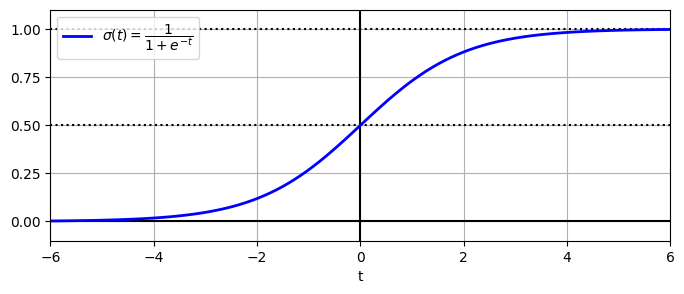

In [58]:
lim = 6
t = np.linspace(-lim, lim, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(8, 3))
plt.plot([-lim, lim], [0, 0], "k-")
plt.plot([-lim, lim], [0.5, 0.5], "k:")
plt.plot([-lim, lim], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \dfrac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left")
plt.axis([-lim, lim, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()

plt.show()

| Concept          | Explanation                                               |
| ---------------- | --------------------------------------------------------- |
| Linear Score (t) | Weighted sum of inputs: $\theta^T x$                      |
| Sigmoid Function | Maps score to probability: $\sigma(t) = 1 / (1 + e^{-t})$ |
| Prediction Rule  | Predict 1 if $\hat{p} \geq 0.5$, else predict 0           |
| Logit Function   | Inverse of sigmoid: $\log(p / (1 - p))$                   |


## Training and Cost Function

**Goal of Training Logistic Regression**

We want to find the parameters θ that make the model:
- Output high probabilities when y=1 
- Output low probabilities when y=0

**The Cost Function**

**Step 1: Define cost for one example**

For a single training instance:

c(θ)={−log(p^​)−log(1−p^​)​if y=1if y=0​

This means:

    If the model predicts a low probability for a positive case, the cost explodes.

    If the model predicts a high probability for a negative case, same problem.

    If it’s confident and correct, the cost is near 0 ✅

Why -log?
Because:

    −log⁡(1)=0−log(1)=0: perfect prediction

    −log⁡(0.01)≈4.6−log(0.01)≈4.6: very bad prediction

**Step 2: Generalize to whole dataset (Log Loss)**

J(θ)=−m1​i=1∑m​[y(i)log(p^​(i))+(1−y(i))log(1−p^​(i))]

Where:

    mm: number of training samples

    p^(i)=σ(θ⊤x(i))p^​(i)=σ(θ⊤x(i)): predicted probability for example ii

This function is called the log loss or cross-entropy loss.

**Intuition: What Log Loss Does**

    Encourages correct confidence: not just correct class, but high probability

    Penalizes confident wrong predictions heavily

    Smooth and convex: optimization-friendly!

**Step 3: Find parameters that minimize cost**

Unfortunately, there’s **no** magic formula like in linear regression.

So we use **gradient descent.**

**Gradient Descent for Logistic Regression**

We compute the gradient of the cost function with respect to each parameter θjθj​:

∂θj​∂J(θ)​=m1​i=1∑m​[σ(θ⊤x(i))−y(i)]xj(i)​

This is very similar to linear regression.

For each iteration of gradient descent:

1- Compute predictions using p^=σ(θ⊤x)p^​=σ(θ⊤x)

2- Compute the error (p^−y)(p^​−y)

3- Update parameters:

    θj​:=θj​−η⋅∂θj​∂J​

    where ηη is the learning rate

**Variants of Gradient Descent**

    Batch Gradient Descent: Use all training data at once

    Stochastic Gradient Descent (SGD): Use one example at a time

    Mini-batch Gradient Descent: Use a small batch (e.g. 32, 64) at each step

**A Word on Assumptions**

Using log loss assumes:

    Each class's features follow a Gaussian distribution

    This is part of the Maximum Likelihood Estimation (MLE) framework

If this assumption is far from reality, the model may be **biased** — just like how MSE assumes linearity plus Gaussian noise.

## Decision Boundaries

A decision boundary is the line (or surface in higher dimensions) that a model uses to separate different classes.

In simple terms:
>It's the point where the model switches from predicting Class A to Class B.

**Why Decision Boundaries Matter**

1. They Define the Model’s Choices

The **decision boundary** tells us:

- Where the model changes its prediction  
- How the model splits the feature space  

**In the Iris example:**

- Petal width < 1.65 cm → **Not Virginica**  
- Petal width > 1.65 cm → **Virginica**  

That **1.65 cm** threshold is the decision boundary.

2. They Help Us Understand the Model

Visualizing the decision boundary helps us:

- See how the model "thinks"  
- Spot ambiguities or misclassifications  
- Evaluate whether the model is overfitting or underfitting  

**Example:**  
- If the boundary is too complex → **overfitting**  
- If it’s too simple → **underfitting**

3. They Reflect Model Confidence

In **logistic regression**, the decision boundary occurs when:

\[
P(\text{class} = 1) = 0.5
\]

So:

- Near the boundary → the model is **unsure**  
- Far from the boundary → the model is **confident**

This highlights **gray zones** in prediction.

4. They Allow for Generalization

Decision boundaries extend to **unseen data**. That’s how a model makes predictions for new inputs.

Imagine a boundary based on petal width:

- Even if the model never saw a flower with **1.7 cm** width during training,  
- It can still classify it correctly using the learned boundary.

**Example**

**Without decision boundary:**

    You have data, but no rule for classification.

**With decision boundary:**

    You have a rule: e.g., “If petal width > 1.65 → Virginica”

Now the model can classify any new input.

**Logistic Regression classification and decision boundary step by step using the Iris dataset**.

**Import Libraries and Load the Dataset**

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

In [3]:
# Load dataset
iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [5]:
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
iris.target.head(3)  # note that the instances are not shuffled

0    0
1    0
2    0
Name: target, dtype: int64

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

**Split Data and Train the Model**

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

**Visualize Predicted Probabilities**

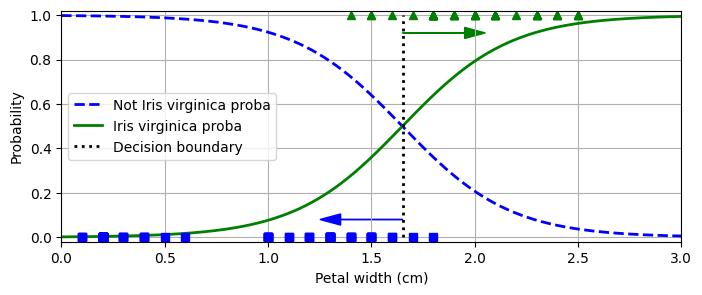

In [15]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(8, 3))  # extra code – not needed, just formatting
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()

plt.show()

In [10]:
decision_boundary

1.6516516516516517

**Make Predictions**

In [11]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

**Explanation of the Results**

    Petal widths < 1.6 cm → likely not Virginica

    Petal widths > 1.6 cm → likely Virginica

    This matches botanical data:

        Virginica: petal width 1.4–2.5 cm

        Others: petal width 0.1–1.8 cm

**Visualization: What You See**

    A green curve: probability the flower is Virginica

    A blue dashed curve: probability the flower is not Virginica

    A vertical line: the decision boundary (around 1.65 cm)

At this line, the model is **50% unsure** — it classifies based on whichever probability is higher.

>Add Petal Length to Improve

This will create a **linear decision boundary in 2D space**, which looks like a straight diagonal line separating the two classes.

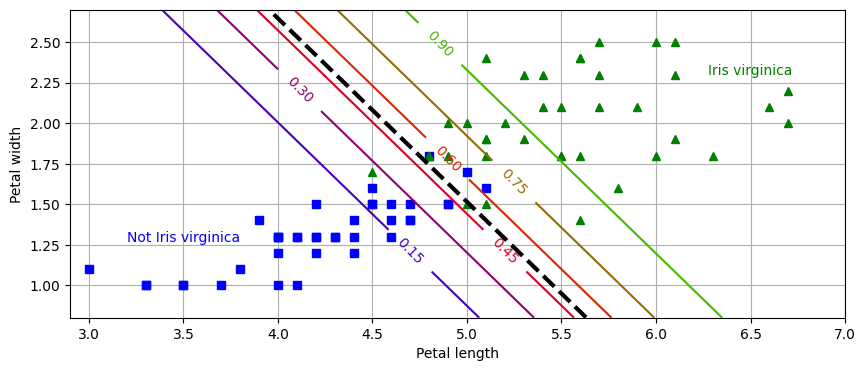

In [12]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

# for the contour plot
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]  # one instance per point on the figure
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)

# for the decision boundary
left_right = np.array([2.9, 7])
boundary = -((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])
             / log_reg.coef_[0, 1])

plt.figure(figsize=(10, 4))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()

plt.show()

## Softmax Regression

**Softmax Regression (Multinomial Logistic Regression)**

Softmax Regression is a **generalization of logistic regression** for multi-class classification.  
Instead of training separate binary classifiers, it can directly **predict multiple classes**.

**How It Works**

1. **Score Computation**

For each input \( \mathbf{x} \), compute a **score** for each class \( k \):

\[
s_k(\mathbf{x}) = \boldsymbol{\theta}^{(k)\top} \mathbf{x}
\]

- Each class \( k \) has its own **parameter vector** \( \boldsymbol{\theta}^{(k)} \)
- All parameter vectors are stored in a matrix \( \Theta \)

2. **Softmax Function**

Compute the **probability** for each class using the **softmax** function:

\[
\hat{p}_k = \frac{e^{s_k(\mathbf{x})}}{\sum_{j=1}^K e^{s_j(\mathbf{x})}}
\]

Where:
- \( K \): number of classes
- \( s_k(\mathbf{x}) \): score for class \( k \)
- \( \hat{p}_k \): predicted probability that input belongs to class \( k \)

3. **Prediction**

Predict the class with the **highest probability**:

\[
\hat{y} = \arg\max_k \hat{p}_k = \arg\max_k s_k(\mathbf{x})
\]

**When to Use Softmax**

Use when:
- Classes are **mutually exclusive** (e.g., one flower species per input)

Don’t use when:
- You want to predict **multiple classes at once** (e.g., multiple people in a photo)

**Training with Cross-Entropy Loss**

To train the model, minimize the **cross-entropy cost function**:

\[
J(\Theta) = -\frac{1}{m} \sum_{i=1}^m \sum_{k=1}^K y_k^{(i)} \log \hat{p}_k^{(i)}
\]

- \( m \): number of training samples
- \( y_k^{(i)} \): 1 if sample \( i \) belongs to class \( k \), else 0
- \( \hat{p}_k^{(i)} \): predicted probability of class \( k \)


In [17]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [18]:
softmax_reg.predict([[5, 2]])

array([2])

In [19]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])

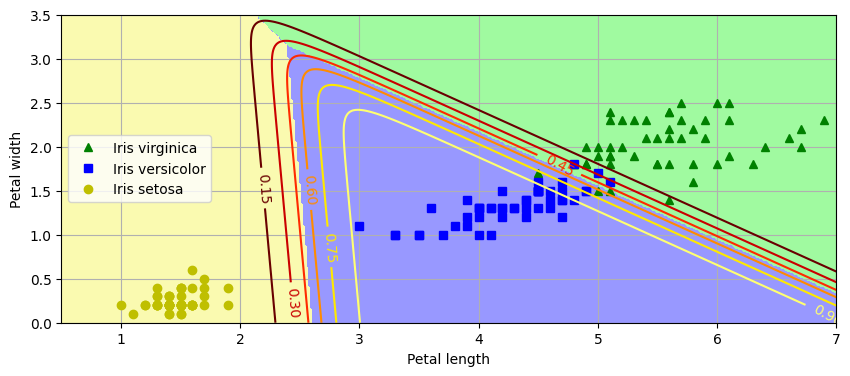

In [20]:
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")
plt.axis([0.5, 7, 0, 3.5])
plt.grid()

plt.show()

**Summery**

| Method                | Use Case                    | Output                        | Example                 |
| --------------------- | --------------------------- | ----------------------------- | ----------------------- |
| Logistic Regression   | Binary classification       | One probability (P(class=1))  | Email: spam or not      |
| Softmax Regression    | Multiclass (1 of K)         | Vector of class probabilities | Predict flower species  |
| Sigmoid + Multi-label | Multi-output classification | Independent probabilities     | Tags on a YouTube video |


**Don't Use Softmax Regression When**

| Scenario                                       | Better Alternative                                                                |
| ---------------------------------------------- | --------------------------------------------------------------------------------- |
| Each input can have **multiple classes**       | Use **multi-label classifiers** (e.g., sigmoid + binary classifiers)           |
| Data has **nonlinear boundaries**              | Use **nonlinear models** (e.g., decision trees, SVM with kernels, neural nets) |
| You need **hierarchical or structured output** | Use **structured prediction models**                                           |
| Problem involves **ranking or regression**     | Use appropriate models like **ranking algorithms** or **regression models**    |


**Use Softmax Regression when**

1. You Have a Multiclass Classification Problem

Softmax regression is ideal when your target variable has **three or more classes**, and each instance belongs to **exactly one class**.

**Examples:**
- Iris flower species → `setosa`, `versicolor`, `virginica`  
- Handwritten digit recognition → `0–9`  
- Type of fruit → `apple`, `banana`, `cherry`

2. Classes Are Mutually Exclusive

Each input can only belong to **one class**. You want the model to pick **one best option**.

**Don’t use softmax** if **multiple labels** can apply to the same input (i.e., multi-label classification).

3. You Want Probabilistic Outputs

Softmax gives you a **probability distribution** over all classes:

\[
P(y = k \mid \mathbf{x}) = \frac{e^{s_k(\mathbf{x})}}{\sum_{j=1}^{K} e^{s_j(\mathbf{x})}}
\]

Where:
- \( s_k(\mathbf{x}) \) is the score for class \( k \)
- \( K \) is the total number of classes

You can:
- Interpret **model confidence**
- Apply **thresholds** for decision-making
- Use for **ranking** or **comparison** across classes

4. You Need a Simple, Linear Multiclass Model

Softmax regression is a **linear classifier**:

- Works well when data is **linearly separable** or **nearly linear**
- Can be used as a **baseline model** before trying more complex classifiers (like SVMs or neural nets)